In [2]:
import os
import pandas as pd
import numpy as np
import pandas as pd
#import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
from scipy import stats

In [4]:
pwd

'/home/sreenath/Documents/Work/NOAA/SPLASH/SPLASH_scripts'

In [5]:
#read in all the data into one pandas frame
def create_df(source):
    source_dir = '/home/sreenath/Documents/Work/NOAA/SPLASH/' + source
    print(source_dir)
    
    #move into the iop folder
    os.chdir(source_dir)
    
    df = pd.DataFrame()
    for i, file_name in enumerate(os.listdir(source_dir)):
        if file_name.endswith('.FLX1'):
            print(file_name)
    #        print(i)
            x = pd.read_table(file_name,delimiter=r"\s+")
            df = pd.concat([df,x],axis=0)
        if file_name.endswith('Summary.txt'):
            print(file_name)
    #        print(i)
            x = pd.read_table(file_name,delimiter=r"\s+",skiprows=[1])
            df = pd.concat([df,x],axis=0)
    return df


In [6]:
#%pwd
#source directory inside SPLASH directory
#source = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
file_dir = 'Tower_Data/Kettle_Ponds/KPA22_001-365'
KP10_flux_df = create_df(file_dir)

file_dir = 'Tower_Data/Kettle_Ponds/KPB22_001-365'
KP03_flux_df = create_df(file_dir)


/home/sreenath/Documents/Work/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPA22_001-365
KPA22_298.FLX1
KPA22_226.FLX1
KPA22_262.FLX1
KPA22_187.FLX1
KPA22_173.FLX1
KPA22_334.FLX1
KPA22_066.FLX1
KPA22_103.FLX1
KPA22_091.FLX1
KPA22_311.FLX1
KPA22_122.FLX1
KPA22_304.FLX1
KPA22_125.FLX1
KPA22_247.FLX1
KPA22_204.FLX1
KPA22_048.FLX1
KPA22_337.FLX1
KPA22_264.FLX1
KPA22_201.FLX1
KPA22_348.FLX1
KPA22_254.FLX1
KPA22_052.FLX1
KPA22_138.FLX1
KPA22_296.FLX1
KPA22_032.FLX1
KPA22_210.FLX1
KPA22_011.FLX1
KPA22_289.FLX1
KPA22_170.FLX1
KPA22_018.FLX1
KPA22_013.FLX1
KPA22_301.FLX1
KPA22_039.FLX1
KPA22_278.FLX1
KPA22_198.FLX1
KPA22_342.FLX1
KPA22_335.FLX1
KPA22_332.FLX1
KPA22_045.FLX1
KPA22_231.FLX1
KPA22_177.FLX1
KPA22_012.FLX1
KPA22_151.FLX1
KPA22_294.FLX1
KPA22_307.FLX1
KPA22_269.FLX1
KPA22_070.FLX1
KPA22_236.FLX1
KPA22_190.FLX1
KPA22_135.FLX1
KPA22_058.FLX1
KPA22_237.FLX1
KPA22_283.FLX1
KPA22_102.FLX1
KPA22_364.FLX1
KPA22_078.FLX1
KPA22_359.FLX1
KPA22_169.FLX1
KPA22_221.FLX1
KPA22_153.FLX1
KPA22_191.FLX1
KPA22

In [7]:

KP10_flux_df['date'] = pd.to_datetime(KP10_flux_df.date,format='%Y-%m-%d')
KP03_flux_df['date'] = pd.to_datetime(KP03_flux_df.date,format='%Y-%m-%d')


<Axes: xlabel='date'>

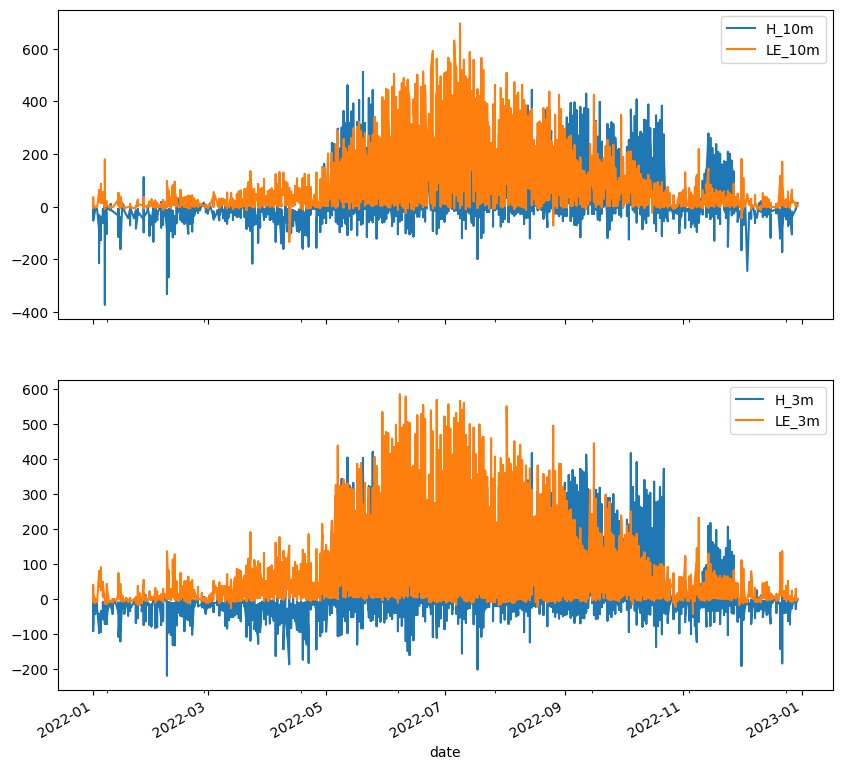

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1,  sharex=True, sharey=False, figsize=(10, 10))

def flux_qc_10(flux_df):
    #NAN filter
    H_f1 = flux_df['H_10m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_10m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


def flux_qc_03(flux_df):
    #NAN filter
    H_f1 = flux_df['H_3m']!=-999
    #qc flag
    H_f2 = flux_df['qc_H'] < 1

    LE_f1 = flux_df['LE_3m']!=-999
    #qc flag
    LE_f2 = flux_df['qc_LE'] < 1
    
    return(flux_df.loc[H_f1 & H_f2 & LE_f1 & LE_f2])


flux_qc_10(KP10_flux_df).plot(x='date',y='H_10m',ax=ax1)
flux_qc_10(KP10_flux_df).plot(x='date',y='LE_10m',ax=ax1)

flux_qc_03(KP03_flux_df).plot(x='date',y='H_3m',ax=ax2)
flux_qc_03(KP03_flux_df).plot(x='date',y='LE_3m',ax=ax2)


#### Check out mid day bowen ratio, and soil moisture at the two levels.

In [9]:
KP10_flux_qc_df = flux_qc_10(KP10_flux_df).copy()
KP03_flux_qc_df = flux_qc_03(KP03_flux_df).copy()

In [10]:
# print(flux_qc_10(KP10_flux_df)['LE_10m'].size)
# print(flux_qc_03(KP03_flux_df)['LE_3m'].size)
#take the same time and make a df with entries at the same time:

flux_df_combined = pd.DataFrame()

flux_df_combined['date'] = KP10_flux_qc_df['date']
flux_df_combined['time(MST)'] = KP10_flux_qc_df['time(MST)']

flux_df_combined = flux_df_combined.merge(KP10_flux_qc_df, on=['date','time(MST)'], how='left')
flux_df_combined = flux_df_combined.merge(KP03_flux_qc_df, on=['date','time(MST)'], how='left')

In [11]:
flux_df_combined['date_time'] = pd.to_datetime(flux_df_combined['date'].astype(str) + ' ' + flux_df_combined['time(MST)'])

In [12]:
flux_df_combined = flux_df_combined.sort_values(by = 'date_time').set_index('date_time',drop=False)

In [13]:
flux_df_combined.columns

Index(['date', 'time(MST)', 'DecDay_x', 'H_10m', 'qc_H_x', 'LE_10m', 'qc_LE_x',
       'co2_flx_10m', 'co2_mix_ratio_x', 'Ts_10m', 'Tair_10m', 'pressure_x',
       'density_x', 'e_10m', 'es_10m', 'RH_x', 'Tdew_x', 'u_unrot_10m',
       'v_unrot_10m', 'w_unrot_10m', 'u_rot_10m', 'wind_speed_x',
       'max_wind_speed_x', 'wind_dir_x', 'u*_10m', 'TKE_10m', 'u_var_10m',
       'v_var_10m', 'w_var_10m', 'Ts_var_10m', 'co2_var_10m', 'h2o_var_10m',
       'DecDay_y', 'H_3m', 'qc_H_y', 'LE_3m', 'qc_LE_y', 'co2_flx_3m',
       'co2_mix_ratio_y', 'Ts_3m', 'Tair_3m', 'pressure_y', 'density_y',
       'e_3m', 'es_3m', 'RH_y', 'Tdew_y', 'u_unrot_3m', 'v_unrot_3m',
       'w_unrot_3m', 'u_rot_3m', 'wind_speed_y', 'max_wind_speed_y',
       'wind_dir_y', 'u*_3m', 'TKE_3m', 'u_var_3m', 'v_var_3m', 'w_var_3m',
       'Ts_var_3m', 'co2_var_3m', 'h2o_var_3m', 'date_time'],
      dtype='object')

In [14]:
# trial_flag1 = KP03_flux_qc_df['date'] >= '2022-01-01'
# trial_flag2 = KP03_flux_qc_df['date'] <= '2022-01-31'

# KP03_flux_qc_df.loc[trial_flag1 & trial_flag2]

In [15]:
pwd()

'/home/sreenath/Documents/Work/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPB22_001-365'

In [17]:
#reading data from the kettle ponds minute data file
input_path = '/home/sreenath/Documents/Work/NOAA/SPLASH/Tower_Data/Kettle_Ponds'
os.chdir(input_path)
kp_met_df = pd.read_csv("KP22_001-365-MET.csv")

#convert the newer file into a csv and read or read it in as a string. 


/tmp/ipykernel_633536/1621049732.py:4: DtypeWarning: Columns (3,4,11,30,46) have mixed types. Specify dtype option on import or set low_memory=False.
  kp_met_df = pd.read_csv("KP22_001-365-MET.csv")


In [18]:
kp_met_df.columns

Index(['date time(MST)', 'DecDay', 'wsp_3m', 'wsp_5m', 'wsp_10m', 'dir_3m',
       'dir_5m', 'dir_10m', 'stheta_3m', 'stheta_5m', 'stheta_10m',
       'Pressure_Avg', 'RH_Avg', 'Tair1_3m', 'Tair2_3m', 'Tair1_5m',
       'Tair2_5m', 'Tair1_10m', 'Tair2_10m', 'SurfT1', 'SurfT2', 'SurfT3',
       'Rg_in_avg', 'Rg_out_avg', 'Lw_in_avg', 'Lw_out_avg', 'ghflx_a',
       'ghflx_b', 'ghflx_c', 'Kt_a', 'Kt_b', 'Kt_c', 'SoilT2a_Avg',
       'SoilT5a_Avg', 'SoilT10a_Avg', 'SoilT20a_Avg', 'SoilT50a_Avg',
       'SoilT2b_Avg', 'SoilT5b_Avg', 'SoilT10b_Avg', 'SoilT20b_Avg',
       'SoilT50b_Avg', 'SoilT2c_Avg', 'SoilT5c_Avg', 'SoilT10c_Avg',
       'SoilT20c_Avg', 'SoilT50c_Avg'],
      dtype='object')

No soil moisture?

<Axes: >

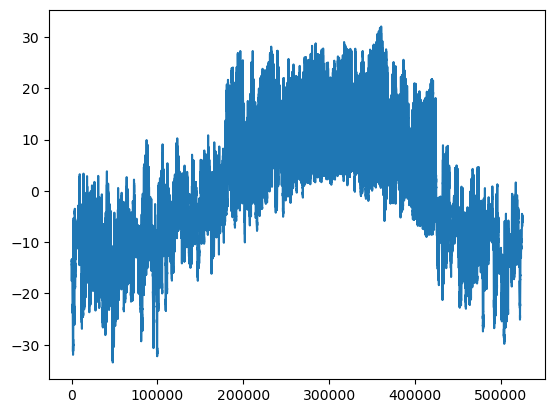

In [19]:
kp_met_df.SurfT1.plot()

#### Checkout H vs sigma_w*delta_T

Select times when delta_T>0, select times when u* > 0.1, use data from 10 meters

In [59]:
#make a dataframe with all the qc flag 0 fluxes, during the day for H
#use the 10 m flux data
#consider data from July-Oct, 2022
#clean the data
#have date, H, sigma_w, in the final column list.


In [20]:
KPA_flux_df_22 = flux_qc_10(KP10_flux_df).copy()

In [21]:
#KPA_flux_df_22['date'] = pd.to_datetime(KPA_flux_df_22.date)

KPA_flux_df_22['date_time'] = pd.to_datetime((KPA_flux_df_22.date.astype(str) + ' ' + KPA_flux_df_22['time(MST)']))

In [22]:

KPA_flux_df_22 = KPA_flux_df_22.set_index('date_time')

In [23]:
#select fluxes for months of june to august

H_month1 = KPA_flux_df_22.index.month >= 6 
H_month2 = KPA_flux_df_22.index.month <= 10 

H_ustar = KPA_flux_df_22['u*_10m'] >= 0.1

H_small = np.abs(KPA_flux_df_22['H_10m']) >= 10


In [24]:
KPA_flux_df_22_subset =  KPA_flux_df_22.loc[H_month1 & H_month2 & H_ustar & H_small].sort_index().copy()

In [25]:
#use the 30-min met data to subset for the day and when delta_T (10_m - surf) < 0
file_path = '/home/sreenath/Documents/Work/NOAA/SPLASH/Tower_Data/Kettle_Ponds/met_data_v23052024/'
file_name = 'KP22_001-365.MET30X'
kp_met_df = pd.read_table(file_path + file_name,delimiter=r"\s+")#,skiprows = [1])

In [26]:
column_names = kp_met_df.columns.to_list()
print(column_names)

['date', 'time(MST)', 'DecDay', 'wsp_3m', 'wsp_5m', 'wsp_10m', 'dir_3m', 'dir_5m', 'dir_10m', 'stheta_3m', 'stheta_5m', 'stheta_10m', 'Pressure_Avg', 'RH_Avg', 'Tair1_3m', 'Tair2_3m', 'Tair1_5m', 'Tair2_5m', 'Tair1_10m', 'Tair2_10m', 'SurfT1_C', 'SurfT2_C', 'SurfT3_C', 'SurfTave_C', 'del_Ts', 'del_ws', 'emm', 'T3m_T5m', 'Ts_Ta', 'NetBodyT', 'Rg_in_avg', 'Rg_out_avg', 'Lw_in_avg', 'Lw_out_avg', 'ghflx_a', 'ghflx_b', 'ghflx_c', 'stor_a', 'stor_b', 'stor_c', 'SoilT2a_Avg', 'SoilT5a_Avg', 'SoilT10a_Avg', 'SoilT20a_Avg', 'SoilT50a_Avg', 'SoilT2b_Avg', 'SoilT5b_Avg', 'SoilT10b_Avg', 'SoilT20b_Avg', 'SoilT50b_Avg', 'SoilT2c_Avg', 'SoilT5c_Avg', 'SoilT10c_Avg', 'SoilT20c_Avg', 'SoilT50c_Avg']


In [27]:

kp_met_df['date_time'] = pd.to_datetime((kp_met_df.date.astype(str) + ' ' + kp_met_df['time(MST)']))
kp_met_df = kp_met_df.set_index('date_time')

In [28]:
#i need a column for delta_T (let's say surf - 10m)
kp_met_df['Tair_10m_mean'] = (kp_met_df['Tair1_10m'] + kp_met_df['Tair2_10m'])/2
kp_met_df['SurfT_C_mean'] = (kp_met_df['SurfT1_C'] + kp_met_df['SurfT2_C'] + + kp_met_df['SurfT3_C'])/3

kp_met_df['delta_T']  =  kp_met_df['Tair_10m_mean'] - kp_met_df['SurfT_C_mean']

<Axes: ylabel='Frequency'>

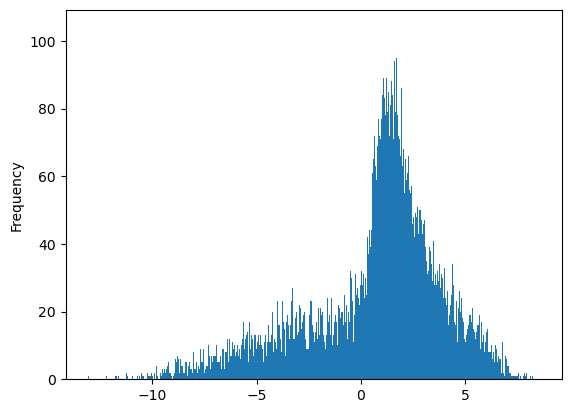

In [29]:
filter = kp_met_df.delta_T > -100
kp_met_df.loc[filter].delta_T.plot.hist(bins=1000)

In [30]:
#now subset this data for the months and for daytime (net rad > 25 w/m2)
#day_f1 = kp_met_df.Rg_in_avg >= 25

month_f1 = kp_met_df.index.month >= 6 
month_f2 = kp_met_df.index.month <= 10 

#delta_T_f = kp_met_df.delta_T > 0.5



In [31]:
#commenting out the delta_T flag. 20240905 paleri
kp_met_df_subset =  kp_met_df.loc[month_f1 & month_f2].sort_index().copy()

<Axes: ylabel='Frequency'>

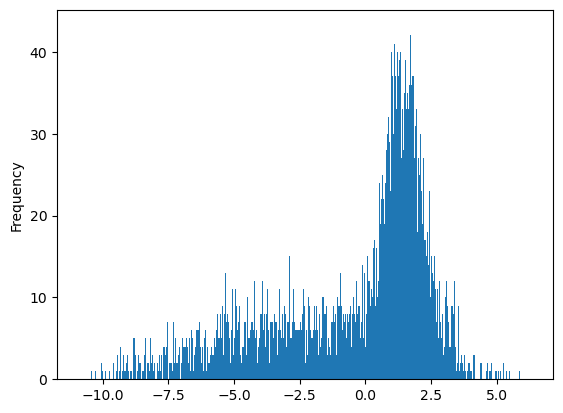

In [32]:
filter = kp_met_df.delta_T > -100
kp_met_df_subset.loc[filter].delta_T.plot.hist(bins=1000)

In [33]:
kp_met_df_subset

,date,time(MST),DecDay,wsp_3m,wsp_5m,wsp_10m,dir_3m,dir_5m,dir_10m,stheta_3m,...,SoilT20b_Avg,SoilT50b_Avg,SoilT2c_Avg,SoilT5c_Avg,SoilT10c_Avg,SoilT20c_Avg,SoilT50c_Avg,Tair_10m_mean,SurfT_C_mean,delta_T
date_time,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,2022-06-01,00:00:00,152.000,1.488,1.784,2.137,291.3,291.9,289.3,5.9,...,8.96,7.36,9.53,10.51,11.06,10.09,7.69,2.955,2.363333,0.591667
2022-06-01 00:30:00,2022-06-01,00:30:00,152.021,2.114,2.463,2.922,296.3,296.2,291.8,7.5,...,8.89,7.36,9.12,10.13,10.78,10.04,7.70,2.540,1.726667,0.813333
2022-06-01 01:00:00,2022-06-01,01:00:00,152.042,2.522,2.919,3.472,279.0,282.7,290.8,9.7,...,8.81,7.37,8.68,9.76,10.51,9.99,7.70,2.550,1.790000,0.760000
2022-06-01 01:30:00,2022-06-01,01:30:00,152.062,2.289,2.580,2.905,290.1,271.0,289.7,9.6,...,8.73,7.38,8.26,9.40,10.25,9.92,7.71,2.635,1.413333,1.221667
2022-06-01 02:00:00,2022-06-01,02:00:00,152.083,2.663,2.943,3.373,292.4,297.7,297.4,8.9,...,8.64,7.38,7.85,9.04,9.99,9.86,7.72,3.160,2.116667,1.043333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 21:30:00,2022-10-31,21:30:00,304.896,2.033,2.240,2.629,317.1,315.4,306.2,4.0,...,3.06,5.88,0.34,0.64,1.25,2.51,5.56,-2.295,-5.193333,2.898333
2022-10-31 22:00:00,2022-10-31,22:00:00,304.917,2.058,2.287,2.654,303.5,309.2,308.2,6.0,...,3.06,5.88,0.34,0.65,1.26,2.51,5.55,-3.070,-5.696667,2.626667
2022-10-31 22:30:00,2022-10-31,22:30:00,304.938,2.545,2.998,3.662,300.5,304.7,300.2,5.5,...,3.06,5.87,0.35,0.65,1.26,2.50,5.55,-3.050,-5.510000,2.460000


In [34]:
KPA_flux_df_22_met = pd.merge(KPA_flux_df_22_subset,kp_met_df_subset, on='date_time')

In [35]:
print(KPA_flux_df_22_subset.columns.to_list())

['date', 'time(MST)', 'DecDay', 'H_10m', 'qc_H', 'LE_10m', 'qc_LE', 'co2_flx_10m', 'co2_mix_ratio', 'Ts_10m', 'Tair_10m', 'pressure', 'density', 'e_10m', 'es_10m', 'RH', 'Tdew', 'u_unrot_10m', 'v_unrot_10m', 'w_unrot_10m', 'u_rot_10m', 'wind_speed', 'max_wind_speed', 'wind_dir', 'u*_10m', 'TKE_10m', 'u_var_10m', 'v_var_10m', 'w_var_10m', 'Ts_var_10m', 'co2_var_10m', 'h2o_var_10m']


In [36]:
KPA_flux_df_22_subset.H_10m/KPA_flux_df_22_subset.density

date_time
2022-06-01 08:30:00    149.944009
2022-06-01 09:00:00    124.915825
2022-06-01 09:30:00    254.269663
2022-06-01 10:00:00    156.144307
2022-06-01 10:30:00    213.769752
                          ...    
2022-10-31 12:30:00     16.035635
2022-10-31 14:30:00     15.229563
2022-10-31 15:30:00    -37.263626
2022-10-31 16:00:00    -40.863787
2022-10-31 19:00:00    -17.698154
Length: 2430, dtype: float64

In [37]:
#reading in the full data to check for flux/density/covariance
file_dir = 'Tower_Data/Kettle_Ponds/KPA22_001-365_full/'
KP10_flux_df_full = create_df(file_dir)


/home/sreenath/Documents/Work/NOAA/SPLASH/Tower_Data/Kettle_Ponds/KPA22_001-365_full/
2022-07-27_smart3-00568-tower_EP-Summary.txt
2022-02-20_smart3-00568-tower_EP-Summary.txt
2022-12-11_smart3-00568-tower_EP-Summary.txt
2022-07-30_smart3-00568-tower_EP-Summary.txt
2022-07-06_smart3-00568-tower_EP-Summary.txt
2022-01-10_smart3-00568-tower_EP-Summary.txt
2022-08-13_smart3-00568-tower_EP-Summary.txt
2022-01-15_smart3-00568-tower_EP-Summary.txt
2022-01-03_smart3-00568-tower_EP-Summary.txt
2022-02-17_smart3-00568-tower_EP-Summary.txt
2022-04-28_smart3-00568-tower_EP-Summary.txt
2022-09-26_smart3-00568-tower_EP-Summary.txt
2022-03-20_smart3-00568-tower_EP-Summary.txt
2022-03-14_smart3-00568-tower_EP-Summary.txt
2022-05-11_smart3-00568-tower_EP-Summary.txt
2022-12-12_smart3-00568-tower_EP-Summary.txt
2022-10-26_smart3-00568-tower_EP-Summary.txt
2022-10-02_smart3-00568-tower_EP-Summary.txt
2022-04-25_smart3-00568-tower_EP-Summary.txt
2022-01-29_smart3-00568-tower_EP-Summary.txt
2022-02-25_sma

In [38]:
print(KP10_flux_df_full.columns.to_list())

['DATAH', 'filename', 'date', 'time', 'DOY', 'daytime', 'file_records', 'used_records', 'Tau', 'qc_Tau', 'rand_err_Tau', 'H', 'qc_H', 'rand_err_H', 'LE', 'qc_LE', 'rand_err_LE', 'co2_flux', 'qc_co2_flux', 'rand_err_co2_flux', 'h2o_flux', 'qc_h2o_flux', 'rand_err_h2o_flux', 'ch4_flux', 'qc_ch4_flux', 'rand_err_ch4_flux', 'none_flux', 'qc_none_flux', 'rand_err_none_flux', 'H_strg', 'LE_strg', 'co2_strg', 'h2o_strg', 'ch4_strg', 'none_strg', 'co2_v-adv', 'h2o_v-adv', 'ch4_v-adv', 'none_v-adv', 'co2_molar_density', 'co2_mole_fraction', 'co2_mixing_ratio', 'co2_time_lag', 'co2_def_timelag', 'h2o_molar_density', 'h2o_mole_fraction', 'h2o_mixing_ratio', 'h2o_time_lag', 'h2o_def_timelag', 'ch4_molar_density', 'ch4_mole_fraction', 'ch4_mixing_ratio', 'ch4_time_lag', 'ch4_def_timelag', 'none_molar_density', 'none_mole_fraction', 'none_mixing_ratio', 'none_time_lag', 'none_def_timelag', 'sonic_temperature', 'air_temperature', 'air_pressure', 'air_density', 'air_heat_capacity', 'air_molar_volume',

<Axes: ylabel='Density'>

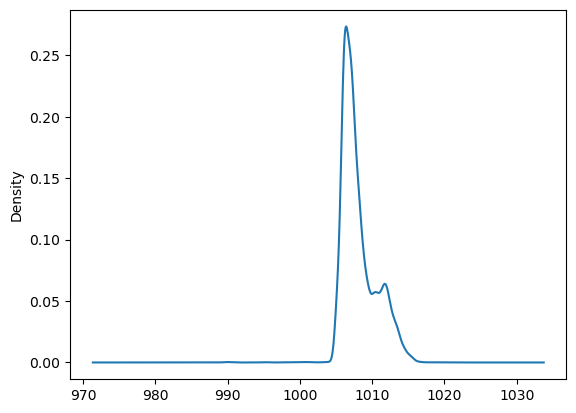

In [39]:
(KP10_flux_df_full['un_H']/(KP10_flux_df_full['air_density']*KP10_flux_df_full['w/ts_cov'])).plot.kde()

looks like the peak is around 1009, and air density was 0.9

using those two values to convert from kinematic to energy units

In [40]:
KPA_flux_df_22_met['H_10m_param'] =((KPA_flux_df_22_met['w_var_10m']**(0.5))*KPA_flux_df_22_met['delta_T'])*KPA_flux_df_22_met['density']*1009

<Axes: xlabel='H_10m', ylabel='H_10m_param'>

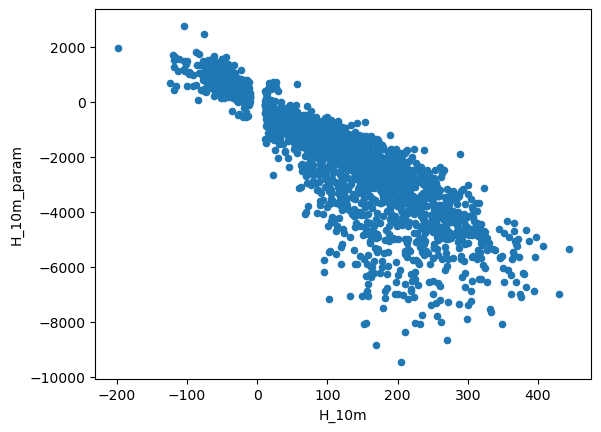

In [41]:
KPA_flux_df_22_met.plot.scatter('H_10m','H_10m_param')

checkout a linear regression of sigma_w_delta_T versus measured fluxes:

In [86]:
y = KPA_flux_df_22_met['H_10m']
x = KPA_flux_df_22_met['H_10m_param']
# y = a + b * x
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [58]:
def linear_regress_scipy(df):
    y = df['H_10m']
    x = df['H_10m_param']
    # y = a + b * x
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return gradient, intercept, r_value, p_value, std_err

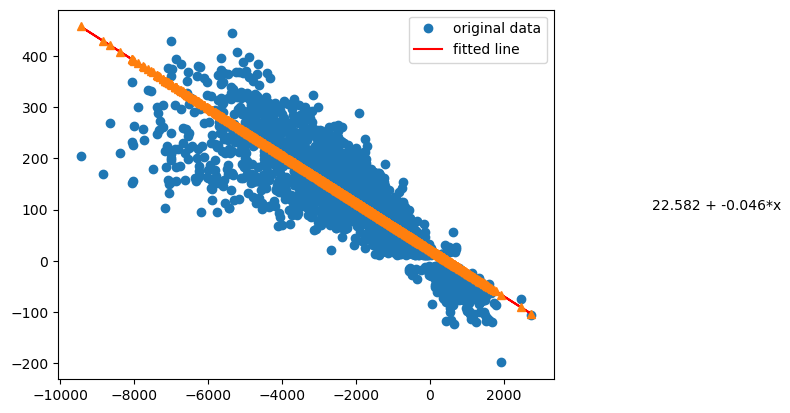

In [87]:

plt.plot(x, y, 'o', label='original data')

plt.plot(x, intercept + gradient*x, 'r', label='fitted line')
plt.plot(x, intercept + gradient*x, '^')

plt.text(6000, 100,f"{intercept:.3f} + {gradient:.3f}*x")

plt.legend()

plt.show()

In [59]:
#let us take half data for july and do the regression and then try to predict the data for the other half:




In [33]:
def calculate_plot_fluxes(df, month_int):
    
    month_flag = df.index.month == month_int 

    df_subset = df.loc[month_flag].copy()

    length_of_df = df_subset.shape[0]

    sample_df = df_subset.sample(n=int(length_of_df/2),random_state=42)


    #try linear regression and get constants for this df:
    gradient, intercept, r_value, p_value, std_err = linear_regress_scipy(sample_df)

    y = sample_df['H_10m']
    x = sample_df['H_10m_param']

    fig, ax = plt.subplots()

    plt.plot(x, y, 'o', color = 'black', label='original data')
    plt.plot(x, intercept + gradient*x, 'r', label='fitted line')

    plt.text(3700, 100,f"{intercept:.3f} + {gradient:.3f}*x")
    ax.set_xlabel(r'$\sigma_w$ * $\Delta$t')
    ax.set_ylabel('H measured')

    plt.legend()


    #create a data frame for the testing data:

    #https://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe
    sample_df_rest = df_subset.loc[~df_subset.index.isin(sample_df.index)].sort_index()
    sample_df_rest['H_10m_modeled'] = intercept + gradient*sample_df_rest['H_10m_param']

    #final plot, checking in with the testing data
    y = sample_df_rest['H_10m_modeled']
    x = sample_df_rest['H_10m']

    fig, ax = plt.subplots()

    plt.plot(x, y, 'o',color='black')
    plt.plot(x, 1*x, 'r', label='1:1 line')
    ax.set_xlabel('H measured')
    ax.set_ylabel('H modelled')
    #plt.plot(sample_df_rest['H_10m_param'], intercept + gradient*sample_df_rest['H_10m_param'], 'blue')
    #plt.text(6000, 100,f"{intercept:.3f} + {gradient:.3f}*x")
    plt.legend()


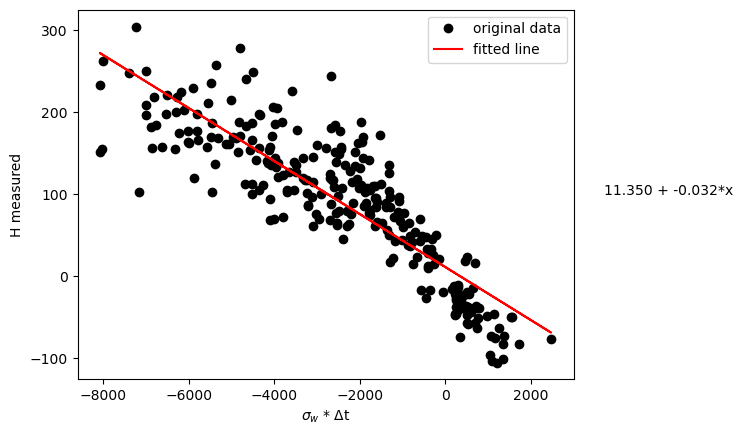

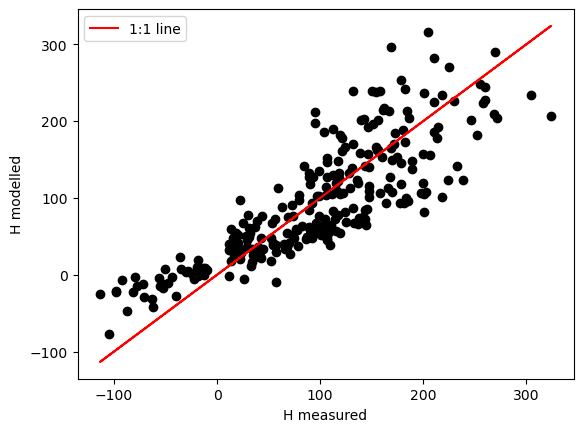

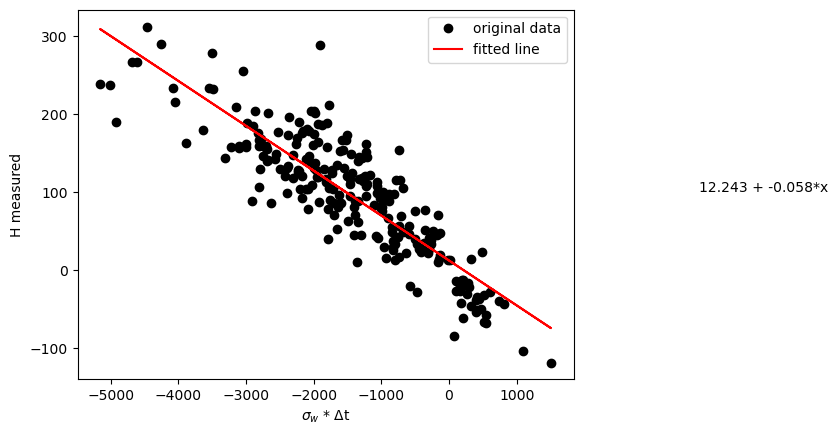

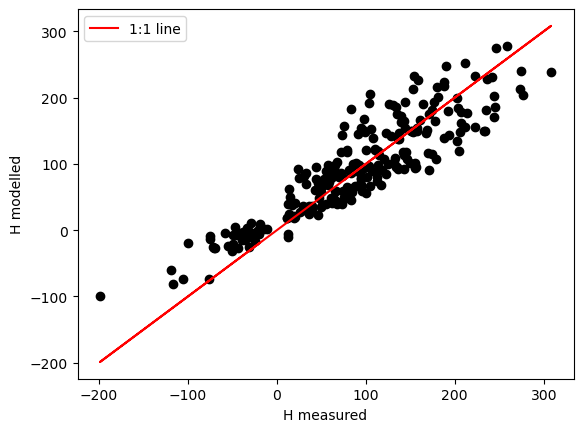

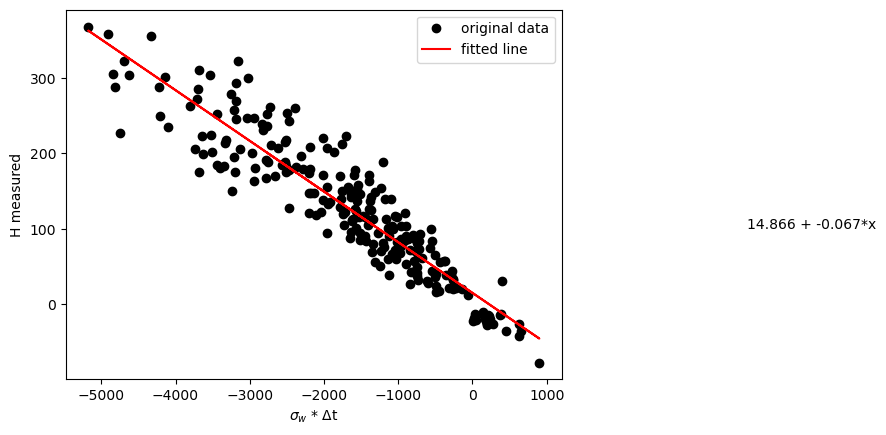

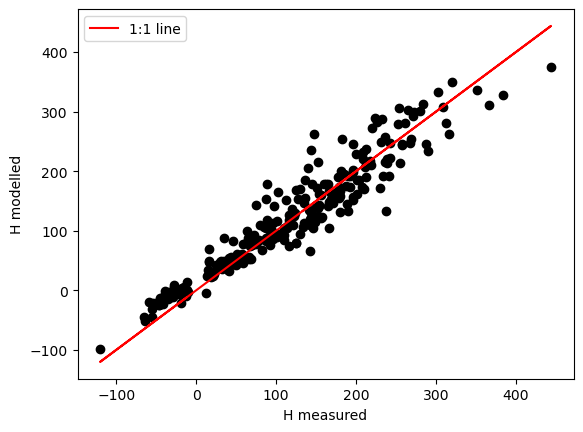

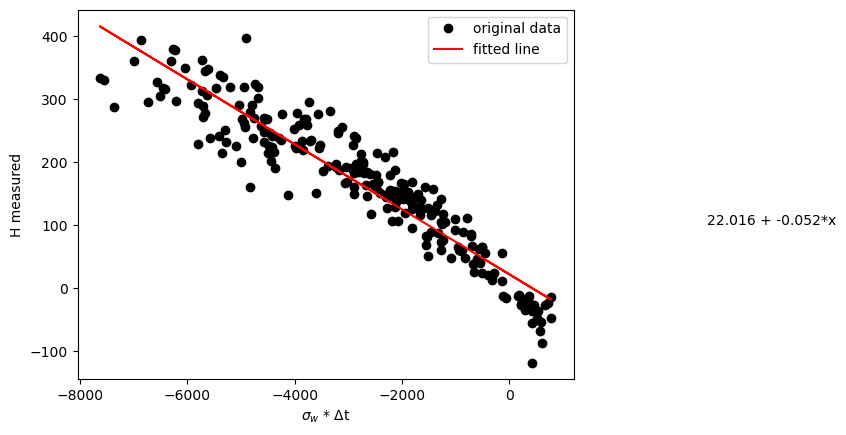

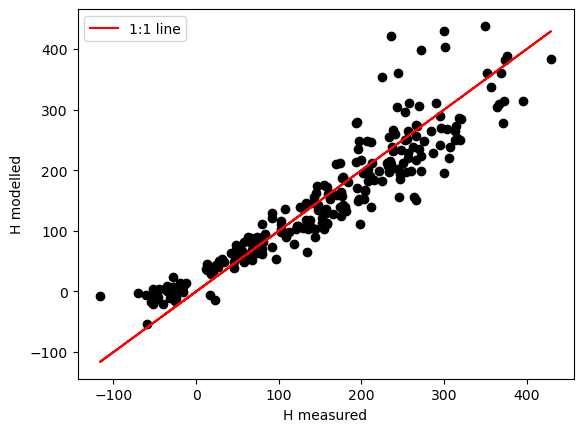

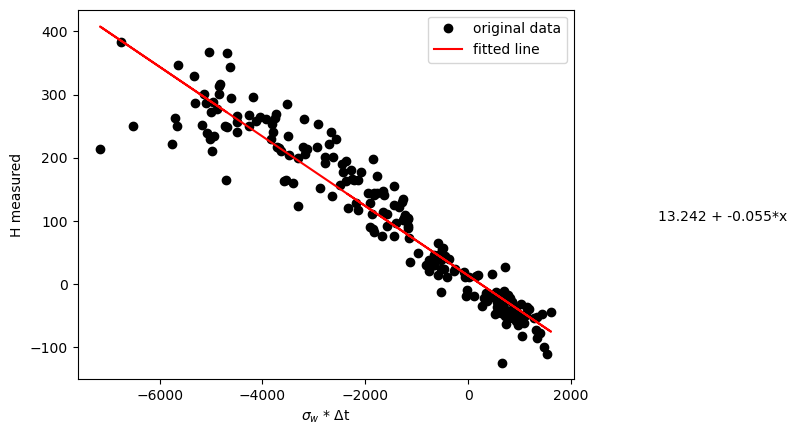

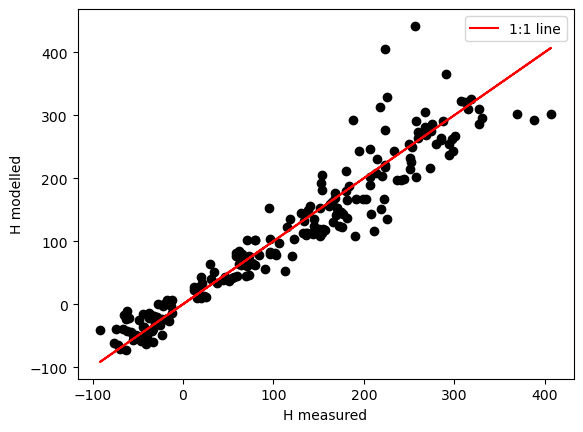

In [88]:
for i in np.arange(6,11):
    calculate_plot_fluxes(KPA_flux_df_22_met,i)

There is some deviation from the 1:1 line and it does not appear in the sigma_w*delta_T plot. Check what is happening here.

#### Parameterize sigma_w/U_bar as a function of Rib and see the dependency:

$Ri_{b}$ = $\frac{g \Delta \theta_{v} \Delta z}{ \overline{\theta_v}(\Delta \overline{u}^{2} \Delta \overline{v}^{2})}$

In [36]:
#right now I'm gonna use theta instead of theta_v. We don't have q measurements. Actually, we can get q from the EC system. It won't change much.
# delta_theta_v ~ delta_theta

In [38]:
print(KPA_flux_df_22_met.columns.to_list())

['date_x', 'time(MST)_x', 'DecDay_x', 'H_10m', 'qc_H', 'LE_10m', 'qc_LE', 'co2_flx_10m', 'co2_mix_ratio', 'Ts_10m', 'Tair_10m', 'pressure', 'density', 'e_10m', 'es_10m', 'RH', 'Tdew', 'u_unrot_10m', 'v_unrot_10m', 'w_unrot_10m', 'u_rot_10m', 'wind_speed', 'max_wind_speed', 'wind_dir', 'u*_10m', 'TKE_10m', 'u_var_10m', 'v_var_10m', 'w_var_10m', 'Ts_var_10m', 'co2_var_10m', 'h2o_var_10m', 'date_y', 'time(MST)_y', 'DecDay_y', 'wsp_3m', 'wsp_5m', 'wsp_10m', 'dir_3m', 'dir_5m', 'dir_10m', 'stheta_3m', 'stheta_5m', 'stheta_10m', 'Pressure_Avg', 'RH_Avg', 'Tair1_3m', 'Tair2_3m', 'Tair1_5m', 'Tair2_5m', 'Tair1_10m', 'Tair2_10m', 'SurfT1_C', 'SurfT2_C', 'SurfT3_C', 'SurfTave_C', 'del_Ts', 'del_ws', 'emm', 'T3m_T5m', 'Ts_Ta', 'NetBodyT', 'Rg_in_avg', 'Rg_out_avg', 'Lw_in_avg', 'Lw_out_avg', 'ghflx_a', 'ghflx_b', 'ghflx_c', 'stor_a', 'stor_b', 'stor_c', 'SoilT2a_Avg', 'SoilT5a_Avg', 'SoilT10a_Avg', 'SoilT20a_Avg', 'SoilT50a_Avg', 'SoilT2b_Avg', 'SoilT5b_Avg', 'SoilT10b_Avg', 'SoilT20b_Avg', 'Soil

In [48]:
g = 9.8


KPA_flux_df_22_met['delta_u'] = KPA_flux_df_22_met['u_unrot_10m']
KPA_flux_df_22_met['delta_v'] = KPA_flux_df_22_met['v_unrot_10m']

delta_z = 10.


In [41]:
#KPA_flux_df_22_met['Tair_10m_mean']

In [49]:
KPA_flux_df_22_met['Rib'] = (g*KPA_flux_df_22_met['delta_T']*delta_z)/((KPA_flux_df_22_met['Tair_10m_mean']+273.15)*(KPA_flux_df_22_met.delta_u**2+KPA_flux_df_22_met.delta_v**2))

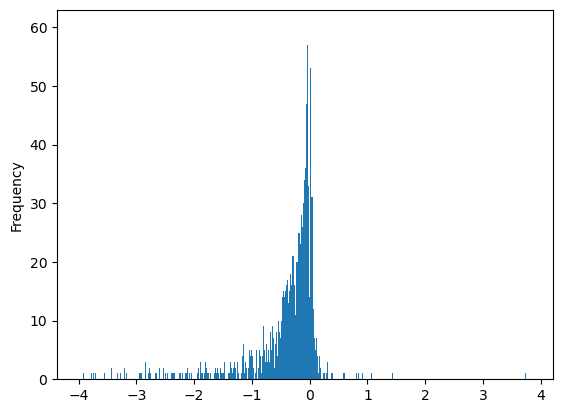

In [53]:
filter = np.abs(KPA_flux_df_22_met.Rib) < 4
ax = KPA_flux_df_22_met.loc[filter].Rib.plot.hist(bins=1000)

<Axes: ylabel='Frequency'>

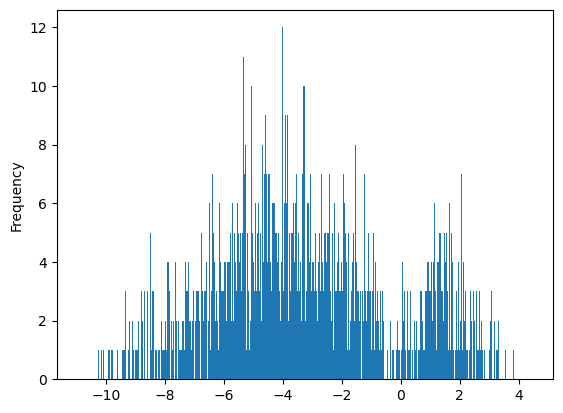

In [93]:
filter = KPA_flux_df_22_met.delta_T > -100
KPA_flux_df_22_met.loc[filter].delta_T.plot.hist(bins=1000)

In [54]:
KPA_flux_df_22_met['sigma_w_10_non_dim'] = (KPA_flux_df_22_met['w_var_10m']**(0.5)/KPA_flux_df_22_met['wind_speed'])



In [62]:
x_values_negative = np.arange(int(KPA_flux_df_22_met.Rib.min()),0)

x_values_positive = np.arange(0,int(KPA_flux_df_22_met.Rib.max()))
unstable_y = 0.125*((1-10*x_values_negative)**(1/3))
stable_y = 0.125/((1+10*x_values_positive)**(1/3))

<Figure size 640x480 with 0 Axes>

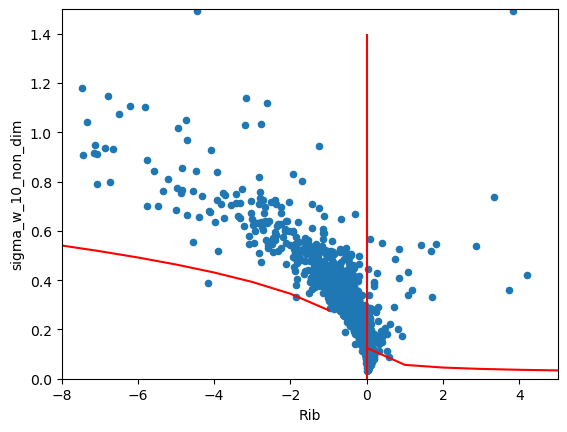

In [64]:
plt.figure()
ax1 = KPA_flux_df_22_met.plot.scatter(x='Rib', y='sigma_w_10_non_dim')
#ax1.set_xscale('symlog')
plt.plot(x_values_negative,unstable_y,'r')
plt.plot(x_values_positive,stable_y,'r')
ax1.set_ylim([0,1.5])
ax1.set_xlim([-8,5])
ax1.vlines(x=0,ymin=0,ymax=1.4,colors='r')


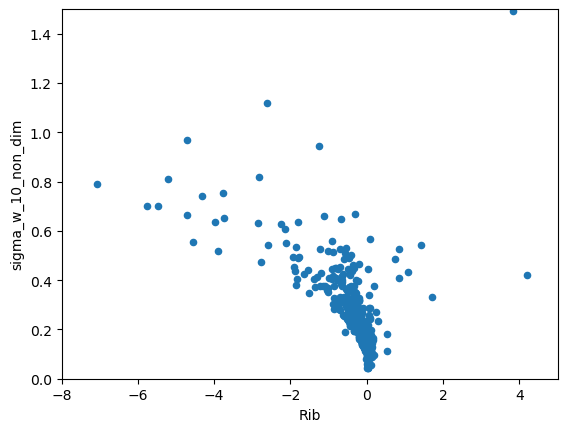

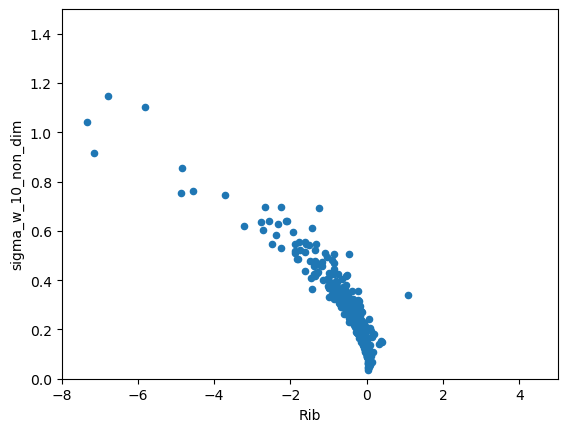

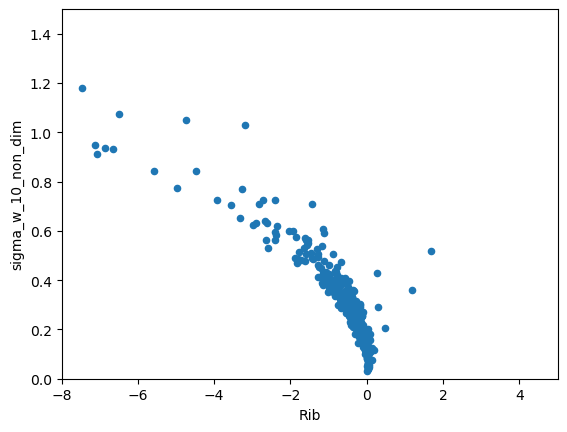

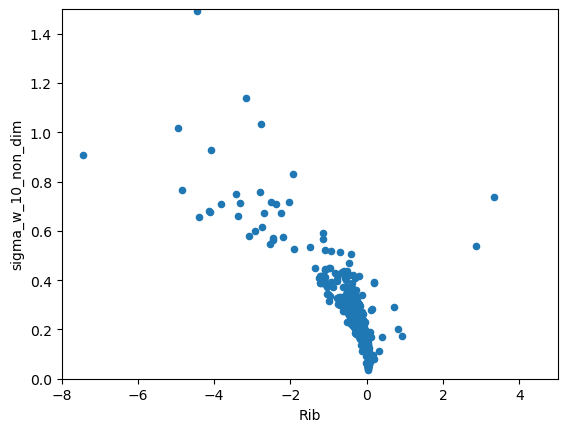

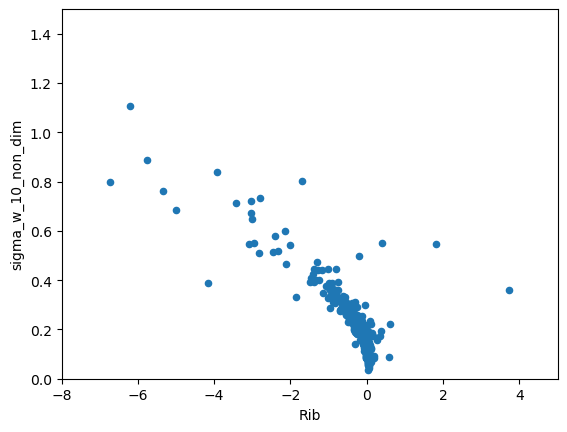

In [119]:
for i in np.arange(6,11):

    month_int = i
    month_flag = KPA_flux_df_22_met.index.month == month_int 

    KPA_flux_df_22_met_subset = KPA_flux_df_22_met.loc[month_flag].copy()


    ax1 = KPA_flux_df_22_met_subset.plot.scatter(x='Rib', y='sigma_w_10_non_dim')
    #ax1.set_xscale('symlog')
    ax1.set_ylim([0,1.5])
    ax1.set_xlim([-8,5])


not bad. looks like we don't have a lot of good stable time data. :(